<a href="https://colab.research.google.com/github/AinaBrichs/Python-metodes-numerics/blob/master/1444230.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrega de Métodos Numéricos I
====


Aina Brichs Ralló,
1444230,
ainabrichs@gmail.com

Este programa genera números aleatorios que están distribuidos como una distribución de Cauchy usando el método Monte Carlo. Se piden resultados intermedios y se representan los números generados en dos gráficas.


**1. Importa las librerías numpy, scipy.stats y matplotlib.pyplot.**


















In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scipy

**2. Obten 50 números espaciados uniformemente entre -4 y 4. Escribe la media, mediana, desviación estándar y varianza de estos números.**






In [35]:

dades = np.linspace(-4.0,4.0, num=50)
print(dades)

[-4.         -3.83673469 -3.67346939 -3.51020408 -3.34693878 -3.18367347
 -3.02040816 -2.85714286 -2.69387755 -2.53061224 -2.36734694 -2.20408163
 -2.04081633 -1.87755102 -1.71428571 -1.55102041 -1.3877551  -1.2244898
 -1.06122449 -0.89795918 -0.73469388 -0.57142857 -0.40816327 -0.24489796
 -0.08163265  0.08163265  0.24489796  0.40816327  0.57142857  0.73469388
  0.89795918  1.06122449  1.2244898   1.3877551   1.55102041  1.71428571
  1.87755102  2.04081633  2.20408163  2.36734694  2.53061224  2.69387755
  2.85714286  3.02040816  3.18367347  3.34693878  3.51020408  3.67346939
  3.83673469  4.        ]


In [36]:
#media
media = np.mean(dades)
print("media =", media)

#mediana
mediana = np.median(dades)
print("mediana =", mediana)

#desviación estándar
desviación = np.std(dades)
print("desviación estándar", desviación)

#varianza
varianza = np.var(dades)
print("varianza =", varianza)

media = -2.842170943040401e-16
mediana = 0.0
desviación estándar 2.356060357495806
varianza = 5.551020408163265


**3. Accede a la distribución de Cauchy a partir de scipy y escribe la media, la desviación estándar, la distribución cumulativa en 0 y 
el máximo de esta distribución. Razona por qué se obtienen esos valores para la media y la desviación estándar.**


In [37]:
from scipy.stats import cauchy

X= scipy.cauchy(dades)

A = scipy.cauchy.cdf(0) #funció acumulada

màxim = scipy.cauchy.pdf(0) #màxim de la funció

print("funció acumulativa =", A)
print("màxim de la distribució = ", màxim)

cauchy.stats(moments='mvsk')





funció acumulativa = 0.5
màxim de la distribució =  0.3183098861837907


(array(nan), array(nan), array(nan), array(nan))

In [0]:
#La distribució de Cauchy no té valors de mitja ni de desviació estàndard perquè les seves integrals són divergents.

**4. Para los 50 números espaciados uniformemente entre -4 y 4, dibuja la correspodiente distribución de Cauchy e indica en una gráfica donde se aceptarán y se rechazarán valores de la ordenada en el método Monte Carlo para x = 1.**



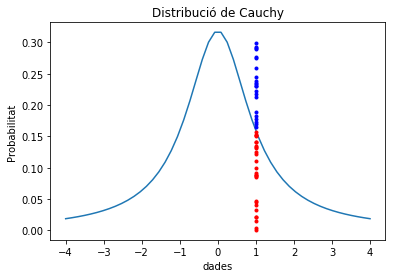

Els nombres acceptats són els vermells i els no acceptats els blaus


In [39]:
X= dades
x=np.empty(49)
Y= scipy.cauchy.pdf(X)

#gràfica distribució de cauchy
plt.plot(X,Y)
plt.title("Distribució de Cauchy")
plt.xlabel("dades") #títol eix x
plt.ylabel("Probabilitat") #títol eix y


import random


#mètode montecarlo per x=1
for i in range(0, 49):
  x[i] = random.uniform(0, màxim)
  if x[i] <= (scipy.cauchy.pdf(1)):
    plt.plot(1, x[i], 'r.')
  else:
    plt.plot(1, x[i], 'b.')
    
plt.show()
print("Els nombres acceptats són els vermells i els no acceptats els blaus")

**5. Genera números aleatorios distribuidos uniformemente entre -4 y 4. A partir de qué potencia de 10 el error en la desviación estándar es menor que 2 por mil.**







In [40]:

error = 1
p = 1

while error >= (2/2000):
  p += 1
  
  n = 10**p
  
  a=np.random.uniform(-4, 4, n)
  error = np.std(a)/np.sqrt(n)

print("A partir d'aquesta potència, l'error és menor que 0.002:", p)  
print ("L'error en aquesta potència és de: ", error)


A partir d'aquesta potència, l'error és menor que 0.002: 7
L'error en aquesta potència és de:  0.0007300917735103089


**6. Genera números aleatorios entre 0 y el máximo de la distribución de Cauchy y acepta únicamente aquellos que satisfacen la condición Monte Carlo. Escribe la media y la desviación estándar de la distribución de los números aceptados.**


Els punts vermells són els valors acceptats


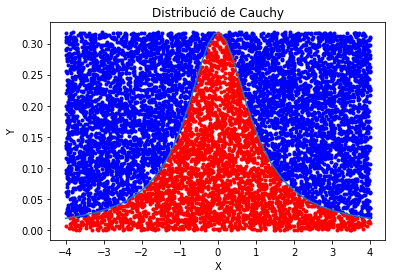

mitjana dels nombres acceptats = 0.09190015526930607
desviació estàndard dels nombres acceptats= 0.07858790333546795


In [88]:
N=100
b = np.empty(N) #ens diu les y
c = np.empty(N) #ens diu les x
bonsy = []
bonsx = []

for i in range (N):
  for j in range (N):
    b[i]=random.uniform(0,màxim) #valors aleatoris de y entre 0 i el màxim
    c[i]=random.uniform(-4,4) #valors aleatoris de x entre -4 i 4
    if b[i]<= scipy.cauchy.pdf(c[i]): #si el valor de y és més petit o igual que la funció de cauchy:
      plt.plot(c[i],b[i],'r.') #pinta el punt de color vermell
      bonsy.append(b[i])  #afageix el número a una llista
      
      bonsx.append(c[i])  
      
    else:
      plt.plot(c[i],b[i], 'b.') #pinta el punt de color blau

plt.plot(X,Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Distribució de Cauchy")

print("Els punts vermells són els valors acceptats")
plt.show()

mitja_bonsy=np.mean(bonsy)
desv_bonsy=np.std(bonsy)

print("mitjana dels nombres acceptats =", mitja_bonsy)
print("desviació estàndard dels nombres acceptats=", desv_bonsy)
  




**7. Dibuja en una gráfica la distribución de Cauchy de los números espaciados uniformemente entre -4 y 4 del principio junto al histograma de los números generados según la distribución de Cauchy de 6 teniendo en cuenta que el área del histograma de los números de 6 debe de coincidir con el área de la distribución de Cauchy en tal intervalo.**


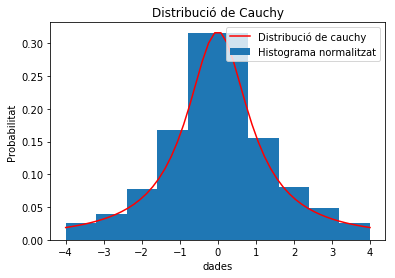

In [89]:
X= dades
x=np.empty(49)
Y= scipy.cauchy.pdf(X)

#gràfica distribució de cauchy
plt.plot(X,Y, 'r', ls='-', label='Distribució de cauchy' )
plt.title("Distribució de Cauchy")
plt.xlabel("dades") #títol eix x
plt.ylabel("Probabilitat") #títol eix y

#histograma
plt.hist(bonsx, density = True, label='Histograma normalitzat')

plt.legend()
plt.show()